In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import math

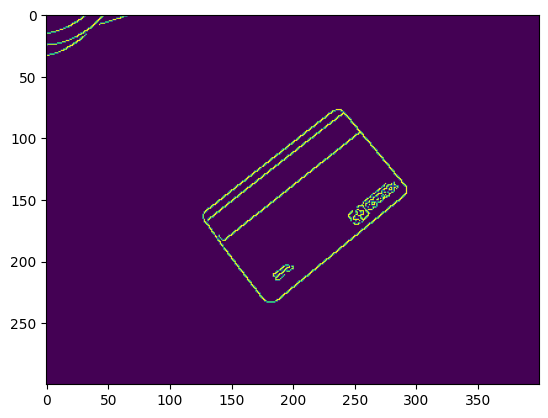

In [2]:
# load the query image, compute the ratio of the old height to the new height, clone it, and resize it
image = cv2.imread('card_image/card8.jpeg')
original = image.copy()
ratio = image.shape[0] / 300.0
image = imutils.resize(image, height = 300)

# convert the image to grayscale, blur it, and find edges in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 40, 200)

plt.imshow(edged)
plt.show()

In [3]:
# find contours in the edged image, keep only the largest ones, and initialize our screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

# loop over our contours
# for c in cnts:
# 	# approximate the contour
# 	peri = cv2.arcLength(c, True)
# 	approx = cv2.approxPolyDP(c, 0.015 * peri, True)
# 	# if our approximated contour has four points, then
# 	# we can assume that we have found our screen
# 	if len(approx) == 4:
# 		screenCnt = approx
# 		break

C:\Users\DELL\AppData\Local\Temp\ipykernel_19048\3917987844.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  apex = np.int0(apex)


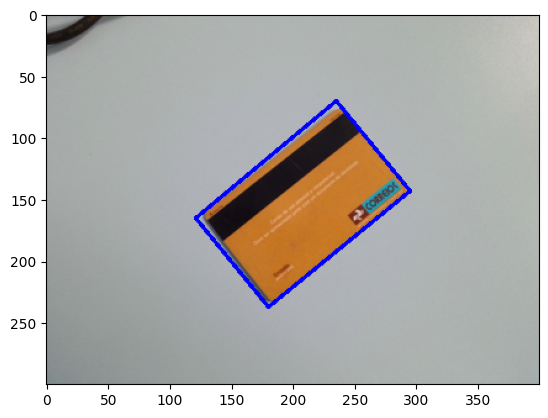

In [4]:
# Vẽ khung hình chữ nhật cho contours có diện tích lớn nhất
rect = cv2.minAreaRect(cnts[0])
apex = cv2.boxPoints(rect)
apex = np.int0(apex)
cv2.drawContours(image,[apex],0,(0,0,255),2)

#cv2.drawContours(image, cnts[0], -1, (0, 255, 0), 3)
plt.imshow(image)
plt.show()

In [5]:
print(apex[0])
print(apex[1])
print(apex[2])
print(apex[3])

# tính góc xoay
print(math.dist(apex[0], apex[1]))
print(math.dist(apex[0], apex[3]))
# angle trả về đơn vị radian
if math.dist(apex[0], apex[1]) > math.dist(apex[0], apex[3]):
    angle = math.atan((apex[0][1] - apex[1][1]) / (apex[0][0] - apex[1][0]))
else:
    angle = math.atan((apex[0][1] - apex[3][1]) / (apex[0][0] - apex[3][0]))
    if apex[0][1] < apex[3][1] and apex[0][1] < apex[2][1]:
        angle = angle - math.pi/2
print(angle)

[121 165]
[235  70]
[295 143]
[180 237]
148.39474384222643
93.08598175880189
-0.6947382761967033


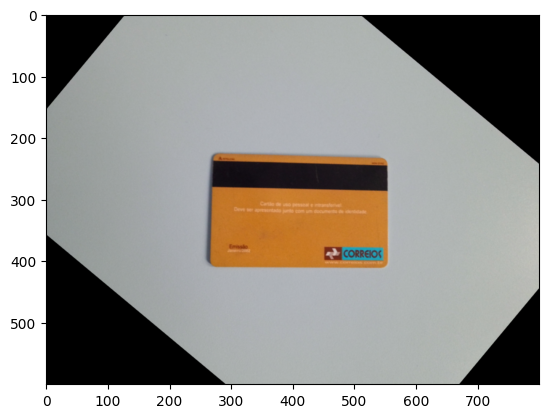

In [6]:
rows,cols,o = original.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),angle * 180 / math.pi,1)
dst = cv2.warpAffine(original,M,(cols,rows))
plt.imshow(dst)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19048\738696305.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  apex = np.int0(apex)


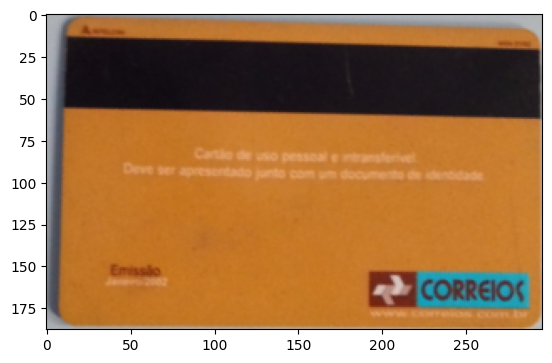

In [7]:
gray = cv2.cvtColor(dst.copy(), cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 40, 200)

cnts = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

# Vẽ khung hình chữ nhật cho contours có diện tích lớn nhất
rect = cv2.minAreaRect(cnts[0])
apex = cv2.boxPoints(rect)
apex = np.int0(apex)

aa = list()
bb = list()
for i in range(len(apex)):
    aa.append(apex[i][0])
    bb.append(apex[i][1])

cropped_img = dst[min(bb):max(bb), min(aa):max(aa)]

#cv2.drawContours(dst,[apex],0,(0,0,255),2)
plt.imshow(cropped_img)
plt.show()